Angel Josue Mazariegos Guzman 19000522 - Sección V

### Ciencia de Datos en Python

# Proyecto #1

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import copy


---
### **2. Usando sclicing con NumPy separar los datos en 2 datasets: entrenamiento(80 %) y validacion y pruebas(20 %).**

In [2]:
dataset = np.load('proyecto_training_data.npy')

dataset_entrenamiento = np.random.choice(dataset.shape[0], size=1168, replace=False)
dataset_validacion = np.setdiff1d(np.arange(dataset.shape[0]), dataset_entrenamiento)

dataset_entrenamiento = dataset[dataset_entrenamiento, :]
dataset_validacion = dataset[dataset_validacion, :]

---
### **3. Analisis exploratorio de datos: Para cada variable en el dataset calcular((usando numpy o pandas)**

- **Media**

In [225]:
media = np.nanmean(dataset, axis=0)
print("Media de cada columna:")
print(f"\nSalePrice: ", media[0])
print("\nOverallQual: ", media[1])
print("\n1stFlrSF: ", media[2])
print("\nTotRmsAbvGrd: ", media[3])
print("\nYearBuilt: ", media[4])
print("\nLotFrontage: ", media[5])

Media de cada columna:

SalePrice:  180921.19589041095

OverallQual:  6.0993150684931505

1stFlrSF:  1162.626712328767

TotRmsAbvGrd:  6.517808219178082

YearBuilt:  1971.267808219178

LotFrontage:  70.04995836802665


 - **Valor maximo**

In [229]:
valor_max = np.nanmax(dataset, axis=0)
print("Valor maximo de cada columna:")
print(f"\nSalePrice: ", valor_max[0])
print("\nOverallQual: ", valor_max[1])
print("\n1stFlrSF: ", valor_max[2])
print("\nTotRmsAbvGrd: ", valor_max[3])
print("\nYearBuilt: ", valor_max[4])
print("\nLotFrontage: ", valor_max[5])

Valor maximo de cada columna:

SalePrice:  755000.0

OverallQual:  10.0

1stFlrSF:  4692.0

TotRmsAbvGrd:  14.0

YearBuilt:  2010.0

LotFrontage:  313.0


- **Valor minimo**

In [231]:
valor_min = np.nanmin(dataset, axis=0)
print("Valor minimo de cada columna:")
print(f"\nSalePrice: ", valor_min[0])
print("\nOverallQual: ", valor_min[1])
print("\n1stFlrSF: ", valor_min[2])
print("\nTotRmsAbvGrd: ", valor_min[3])
print("\nYearBuilt: ", valor_min[4])
print("\nLotFrontage: ", valor_min[5])

Valor minimo de cada columna:

SalePrice:  34900.0

OverallQual:  1.0

1stFlrSF:  334.0

TotRmsAbvGrd:  2.0

YearBuilt:  1872.0

LotFrontage:  21.0


- **Rango (peak to peak)**

In [232]:
rango = valor_max - valor_min
print("Rango de cada columna:")
print(f"\nSalePrice: ", rango[0])
print("\nOverallQual: ", rango[1])
print("\n1stFlrSF: ", rango[2])
print("\nTotRmsAbvGrd: ", rango[3])
print("\nYearBuilt: ", rango[4])
print("\nLotFrontage: ", rango[5])

Rango de cada columna:

SalePrice:  720100.0

OverallQual:  9.0

1stFlrSF:  4358.0

TotRmsAbvGrd:  12.0

YearBuilt:  138.0

LotFrontage:  292.0


- **Desviacion estandar**

In [233]:
desviacion = np.nanstd(dataset_entrenamiento, axis=0, ddof=1)
print("Desviacion estandar de cada columna:")
print(f"\nSalePrice: ", desviacion[0])
print("\nOverallQual: ", desviacion[1])
print("\n1stFlrSF: ", desviacion[2])
print("\nTotRmsAbvGrd: ", desviacion[3])
print("\nYearBuilt: ", desviacion[4])
print("\nLotFrontage: ", desviacion[5])

Desviacion estandar de cada columna:

SalePrice:  78626.10934692445

OverallQual:  1.3580830425748023

1stFlrSF:  401.0285968324654

TotRmsAbvGrd:  1.6499065292405142

YearBuilt:  29.967747399468887

LotFrontage:  25.93150923017594


---
### **4. Para cada variable en el dataset usar seaborn para graficar un histograma de la variable.**

In [237]:
d = { 'SalePrice': dataset[:, 0],
      'OverallQual': dataset[:, 1],
      '1stFlrSF': dataset[:, 2],
      'TotRmsAbvGrd': dataset[:, 3],
      'YearBuilt': dataset[:, 4],
      'LotFrontage': dataset[:, 5]
     }

df = pd.DataFrame(d)
df



,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0
...,...,...,...,...,...,...
1455,175000.0,6.0,953.0,7.0,1999.0,62.0
1456,210000.0,6.0,2073.0,7.0,1978.0,85.0
1457,266500.0,7.0,1188.0,9.0,1941.0,66.0
1458,142125.0,5.0,1078.0,5.0,1950.0,68.0


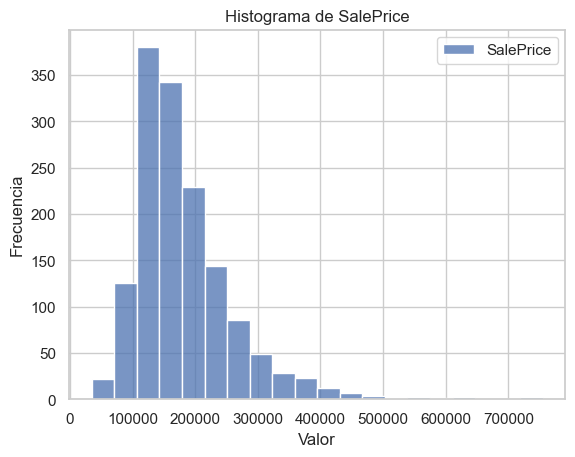

In [238]:
sns.histplot(df["SalePrice"], kde=False, bins=20, label='SalePrice')

sns.set(style="whitegrid")
plt.title('Histograma de SalePrice')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

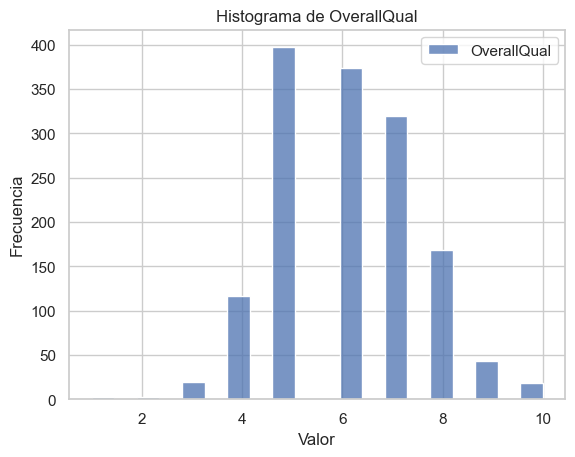

In [239]:
sns.histplot(df["OverallQual"], kde=False, bins=20, label='OverallQual')

sns.set(style="whitegrid")
plt.title('Histograma de OverallQual')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

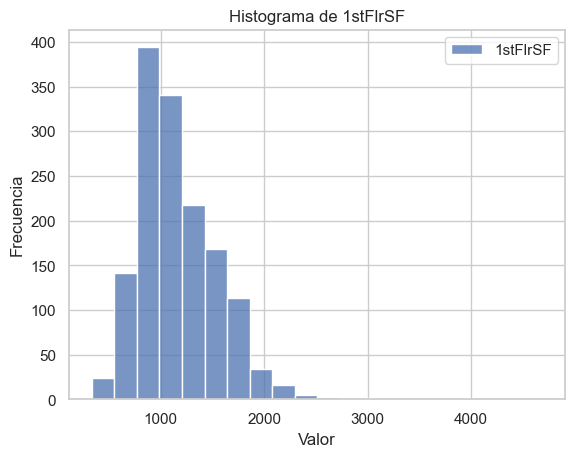

In [240]:
sns.histplot(df["1stFlrSF"], kde=False, bins=20, label='1stFlrSF')

sns.set(style="whitegrid")
plt.title('Histograma de 1stFlrSF')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

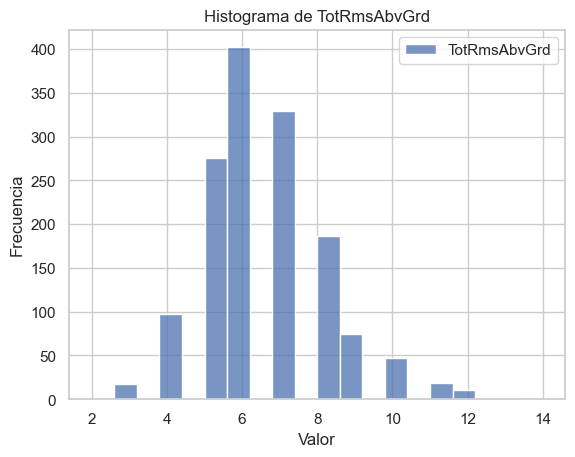

In [241]:
sns.histplot(df["TotRmsAbvGrd"], kde=False, bins=20, label='TotRmsAbvGrd')

sns.set(style="whitegrid")
plt.title('Histograma de TotRmsAbvGrd')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

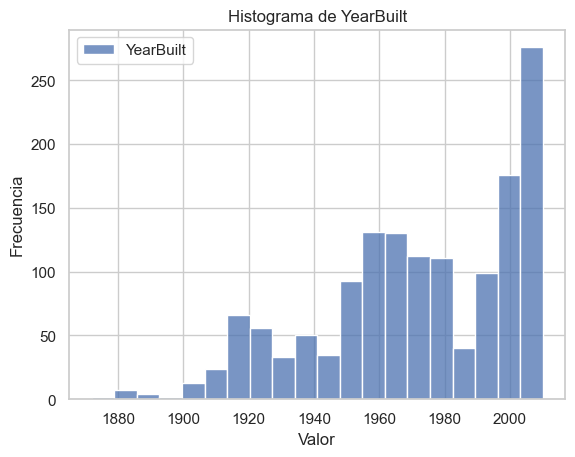

In [242]:
sns.histplot(df["YearBuilt"], kde=False, bins=20, label='YearBuilt')

sns.set(style="whitegrid")
plt.title('Histograma de YearBuilt')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

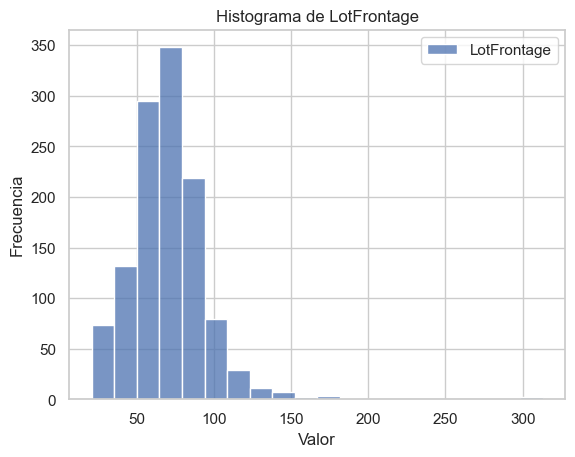

In [243]:
sns.histplot(df["LotFrontage"], kde=False, bins=20, label='LotFrontage')

sns.set(style="whitegrid")
plt.title('Histograma de LotFrontage')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

---
### **5. Para cada variable independiente x :**
- **Calcular el coeficiente de correlación entre x y y.**
- **Graficar x vs y (scatterplot) usando matplotlib.**
- **Colocar el coeficiente de correlación y colocarlo como parte del título de la gráfica.**

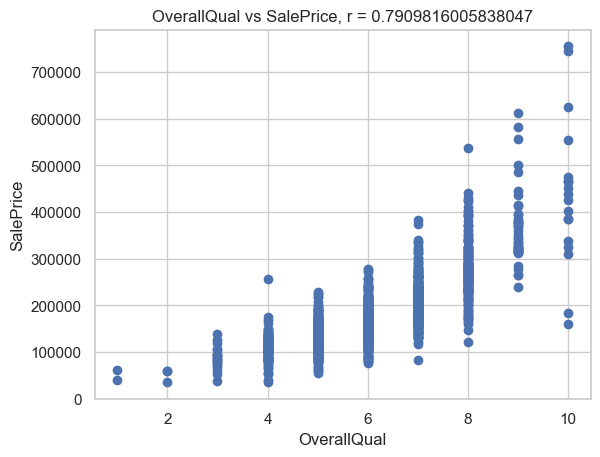

In [244]:
coef_correlacion1 = df['OverallQual'].corr(df['SalePrice'])

plt.scatter(df['OverallQual'], df['SalePrice'])
plt.xlabel('OverallQual')
plt.ylabel('SalePrice')
plt.title(f'OverallQual vs SalePrice, r = {coef_correlacion1}')
plt.grid(True)
plt.show()

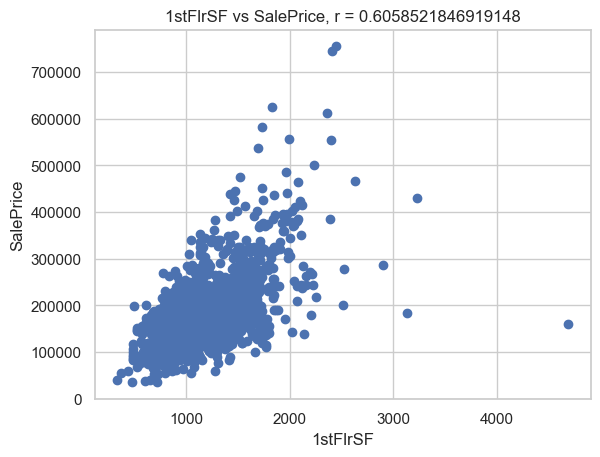

In [246]:
coef_correlacion2 = df['1stFlrSF'].corr(df['SalePrice'])

plt.scatter(df['1stFlrSF'], df['SalePrice'])
plt.xlabel('1stFlrSF')
plt.ylabel('SalePrice')
plt.title(f'1stFlrSF vs SalePrice, r = {coef_correlacion2}')
plt.grid(True)
plt.show()

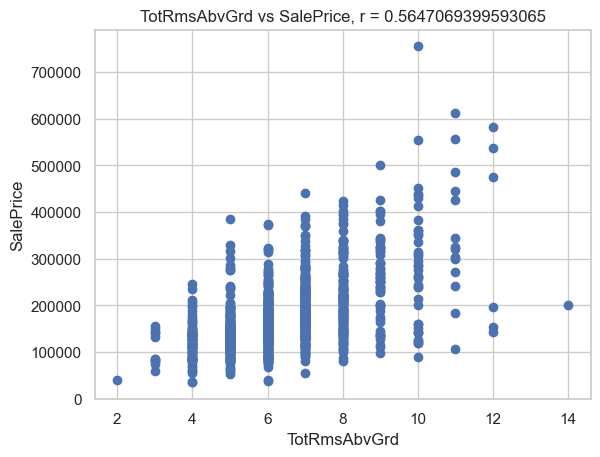

In [42]:
coef_correlacion3 = df['TotRmsAbvGrd'].corr(df['SalePrice'])

plt.scatter(df['TotRmsAbvGrd'], df['SalePrice'])
plt.xlabel('TotRmsAbvGrd')
plt.ylabel('SalePrice')
plt.title(f'TotRmsAbvGrd vs SalePrice, r = {coef_correlacion3}')
plt.grid(True)
plt.show()

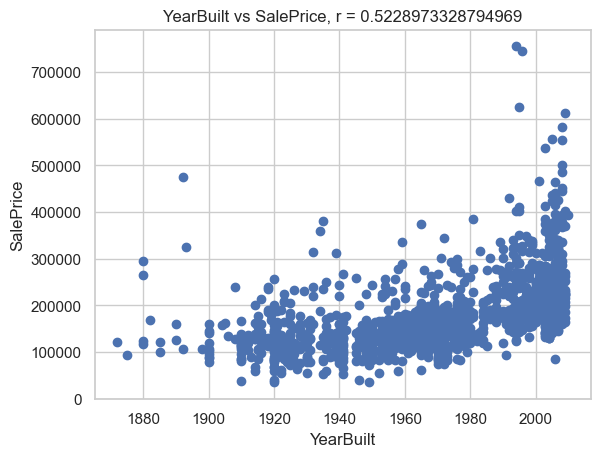

In [247]:
coef_correlacion4 = df['YearBuilt'].corr(df['SalePrice'])

plt.scatter(df['YearBuilt'], df['SalePrice'])
plt.xlabel('YearBuilt')
plt.ylabel('SalePrice')
plt.title(f'YearBuilt vs SalePrice, r = {coef_correlacion4}')
plt.grid(True)
plt.show()

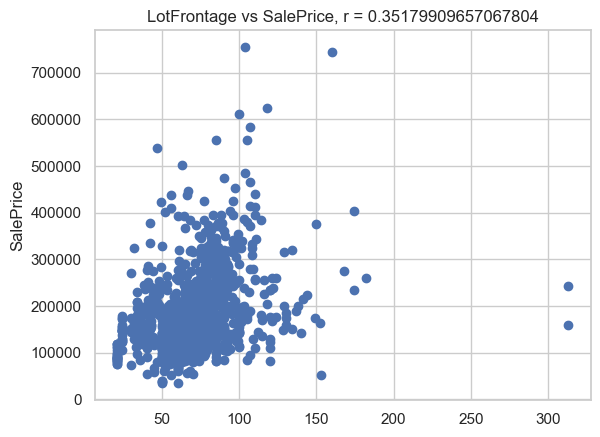

In [248]:
coef_correlacion5 = df['LotFrontage'].corr(df['SalePrice'])

plt.scatter(df['LotFrontage'], df['SalePrice'])
plt.xlabel('')
plt.ylabel('SalePrice')
plt.title(f'LotFrontage vs SalePrice, r = {coef_correlacion5}')
plt.grid(True)
plt.show()

- **Basado en la gráfica y el coeficiente de correlación de cada par x,y elegir las 2 variables
  con más potencial predictivo es decir las 2 variables que presentan mayor correlación
  entre dicha variable y la variable dependiente.**
  
Los valores con mayor coeficiente de correlación:
  - **OverallQual vs SalePrice = 0.79098**
  - **1stFlrSF vs SalePrice = 0.60585**

---
### **6. Crear una funcion para entrenar un modelo de regresion lineal de una variable y = β0 +β1 ∗ x.**

---
Funcion para calculo de prediccion

In [182]:
def entrenar_regresion_lineal(x, y, epochs, imprimir_error_cada, alpha):
    X = np.column_stack((x, np.ones(len(x))))

    beta = np.zeros(2)
    errores = []
    almacen_it = []
    almacen_it.append(copy.deepcopy(beta))
    
    for epoch in range(1, epochs+1):
        y_hat = np.dot(X, beta)
        
        error = np.mean(y_hat - y)
        error = error*error
        error = error/(2*len(X))
        errores.append(error)

        gradiente_beta1 = np.mean((y_hat - y) * X[:, 0])
        gradiente_beta0 = np.mean(y_hat - y)

        beta[0] -= alpha * gradiente_beta1
        beta[1] -= alpha * gradiente_beta0
        almacen_it.append(copy.deepcopy(beta))
        
        if epoch % imprimir_error_cada == 0:
             print(f"Iteración {epoch}: Error = {error}, beta: {beta}")
        
    return almacen_it, errores

In [183]:
def grafic_error(errores):
    num_iteraciones = len(errores)
    
    iteraciones = np.arange(1, num_iteraciones + 1)
    
    plt.plot(iteraciones, errores, marker='o', linestyle='-')
    plt.title('Error')
    plt.xlabel('Número de iteración')
    plt.ylabel('Error')
    plt.grid(True)
    plt.show()

In [184]:
def graficar_evolucion_modelo(beta, x, n):
    plt.figure(figsize=(12, 8))
    
    betas = beta[::int(n)]
    betas = np.array(betas)
    
    for i in range(len(betas)):
        y = betas[i, 0] * x + betas[i, 1]
        plt.plot(x, y)  # Etiqueta con el número de la recta

    plt.xlabel('Eje X')
    plt.ylabel('Precio de la vivienda')
    plt.title('Visualizacion de evolucion de modelo de entrenamiento')
    plt.grid(True)
    plt.show()

In [185]:
def predecir(beta_final, modelo_scikit, x):
    X = np.column_stack((x, np.ones(len(x))))
    
    y_hat1 = np.dot(X, beta_final)
    y_hat2 = modelo_scikit.predict(x.reshape(-1,1)) 
    
    combinacion = (y_hat1 + y_hat2)/2
    
    df = pd.DataFrame({
    'Modelo Entrenado Manual': y_hat1,
    'Modelo Scikit-Learn': y_hat2,
    'Promedio': combinacion
    })
    
    return df

---
### Prediccion usando **1stFlrSF vs SalePrice**

Utilizando modelo entrenado:

In [186]:
beta_final_1stFlrSF, errores= entrenar_regresion_lineal(dataset_entrenamiento[:,2], dataset_entrenamiento[:,0], 24000, 2000, 0.00000132)

#ultima_llave = list(beta_final_1stFlrSF.keys())[-1]
#beta_final1_1stFlrSF = beta_final_1stFlrSF[ultima_llave]

print("Parámetros finales del modelo:", beta_final_1stFlrSF[-1])

Iteración 2000: Error = 5589.960390734517, beta: [153.05743944   9.65952335]
Iteración 4000: Error = 5587.1782775044785, beta: [153.05011603  19.19832262]
Iteración 6000: Error = 5584.239426062411, beta: [153.042751    28.73461282]
Iteración 8000: Error = 5581.302120409985, beta: [153.0353879   38.26839465]
Iteración 10000: Error = 5578.366359777106, beta: [153.02802675  47.79966877]
Iteración 12000: Error = 5575.432143351917, beta: [153.02066753  57.32843584]
Iteración 14000: Error = 5572.49947032272, beta: [153.01331024  66.85469651]
Iteración 16000: Error = 5569.568339877601, beta: [153.00595489  76.37845146]
Iteración 18000: Error = 5566.638751203687, beta: [152.99860147  85.89970133]
Iteración 20000: Error = 5563.710703493235, beta: [152.99124999  95.41844679]
Iteración 22000: Error = 5560.784195932423, beta: [152.98390045 104.93468849]
Iteración 24000: Error = 5557.859227712745, beta: [152.97655283 114.44842709]
Parámetros finales del modelo: [152.97655283 114.44842709]


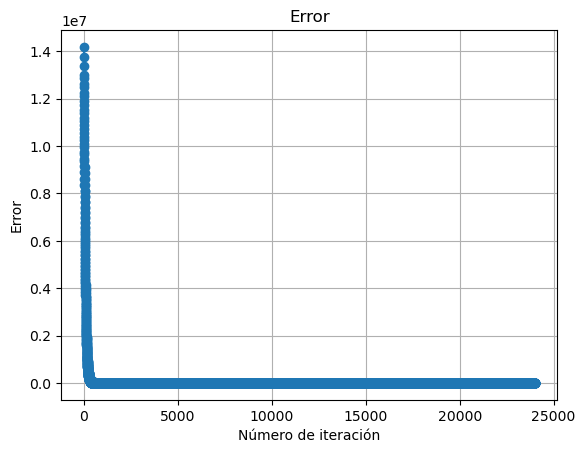

In [7]:
grafic_error(errores)

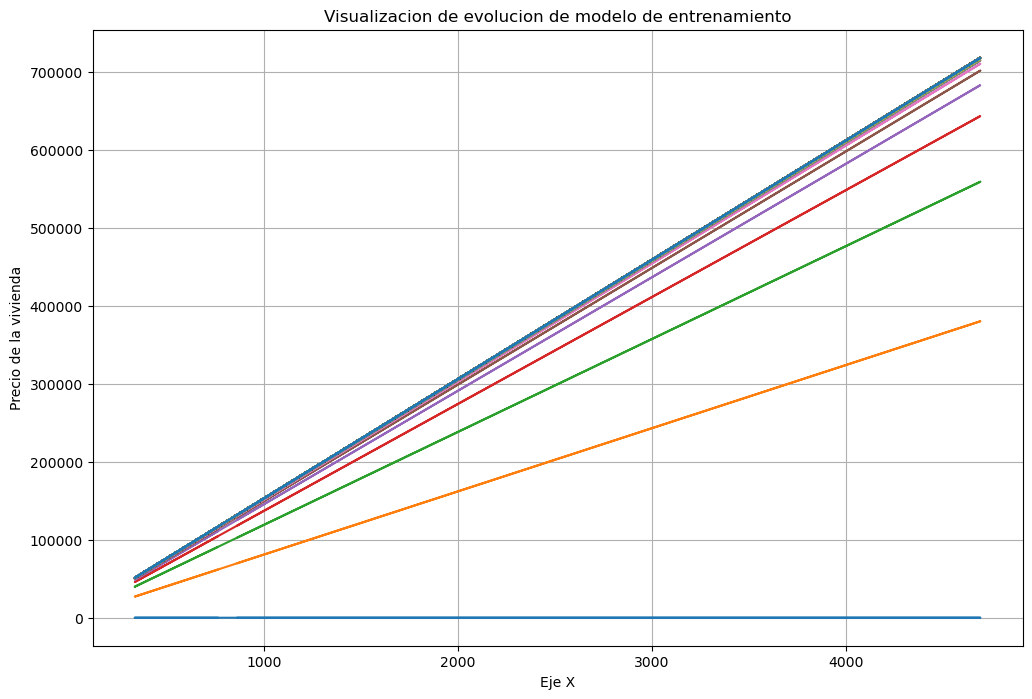

In [189]:
graficar_evolucion_modelo(beta_final_1stFlrSF, dataset_entrenamiento[:,2], 100)

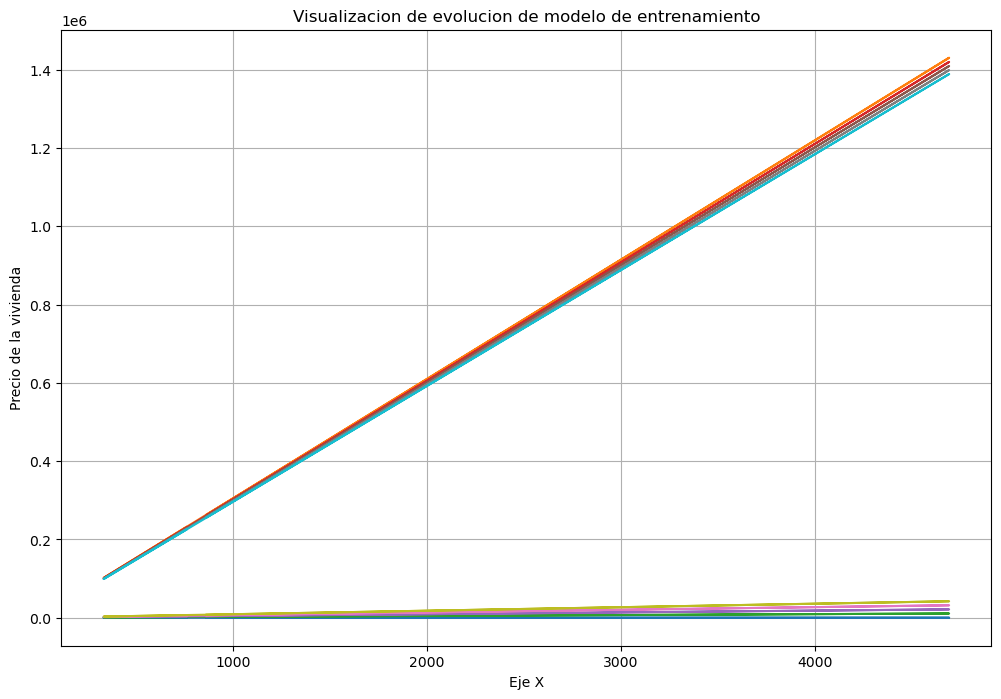

In [190]:
cut = beta_final_1stFlrSF[0:10]
graficar_evolucion_modelo(cut, dataset_entrenamiento[:,2], 1)

**Utilizando Scikit-Learn:**

In [8]:
nueva = (dataset_entrenamiento[:,2]).reshape(-1, 1)
reg = LinearRegression().fit(nueva, dataset_entrenamiento[:,0])

Usando el 20 % de los datos de validacion, aplicamos los modelos predictivos para estimar la variable dependiente y usando los valores reales de "y" calculamos el error de cada modelo.

In [9]:
predicciones = predecir(beta_final1_1stFlrSF, reg, dataset_validacion[:,2])
predicciones

,Modelo Entrenado Manual,Modelo Scikit-Learn,Promedio
0,175272.601419,179456.203994,177364.402706
1,177261.296606,181081.851870,179171.574238
2,169612.468964,174829.360037,172220.914501
3,260174.588240,248858.863346,254516.725793
4,198525.037449,198463.779168,198494.408308
...,...,...,...
287,175119.624866,179331.154157,177225.389512
288,129838.565228,142316.402503,136077.483865
289,217647.106553,214095.008751,215871.057652
290,181850.593191,184833.346971,183341.970081


In [10]:
predicciones['Precio Real'] = dataset_validacion[:,0]
predicciones['Error'] = (((predicciones['Promedio'] - predicciones['Precio Real']).abs())/predicciones['Precio Real'])*100
predicciones[['Promedio', 'Precio Real', 'Error']].abs()

,Promedio,Precio Real,Error
0,177364.402706,250000.0,29.054239
1,179171.574238,325300.0,44.921127
2,172220.914501,139400.0,23.544415
3,254516.725793,165500.0,53.786541
4,198494.408308,153000.0,29.734907
...,...,...,...
287,177225.389512,124000.0,42.923701
288,136077.483865,136500.0,0.309536
289,215871.057652,179600.0,20.195466
290,183341.970081,157900.0,16.112711


In [432]:
promedio_error = predicciones['Error'].mean()
error_max = predicciones['Error'].max()
error_min = predicciones['Error'].min()

print('Error promedio: ', promedio_error)
print('Error maximo', error_max)
print('Error minimo:', error_min)

Error promedio:  27.227219877912674
Error maximo 145.02598816078586
Error minimo: 0.1123845086077242


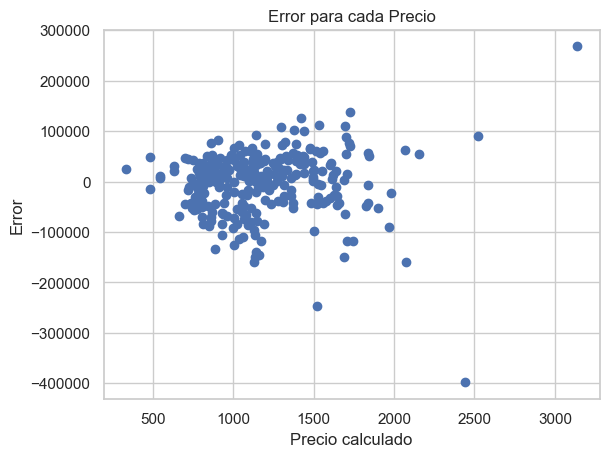

In [434]:
error = predicciones['Promedio'] - predicciones['Precio Real']
plt.plot(dataset_validacion[:,2], error, marker='o', linestyle='')
plt.title('Error para cada Precio')
plt.xlabel('Precio calculado')
plt.ylabel('Error')
plt.grid(True)
plt.show()

### Entrenamiento usando **OverallQual vs SalePrice**

In [196]:
beta_final_OverallQual, errores = entrenar_regresion_lineal(dataset_entrenamiento[:,1], dataset_entrenamiento[:,0], 7700, 700, 0.0255)

# ultima_llave = list(beta_final_OverallQual.keys())[-1]
# beta_final2_OverallQual = beta_final_OverallQual[ultima_llave]

print("Parámetros finales del modelo:", beta_final_OverallQual[-1])

Iteración 700: Error = 1774.140577273669, beta: [ 38460.56342025 -52108.18252991]
Iteración 1400: Error = 334.78356175191897, beta: [ 42284.77043227 -76743.72830589]
Iteración 2100: Error = 63.17426851910871, beta: [ 43945.99919425 -87445.36581696]
Iteración 2800: Error = 11.92109965626017, beta: [ 44667.63403016 -92094.13822329]
Iteración 3500: Error = 2.2495332410784368, beta: [ 44981.11092649 -94113.55673411]
Iteración 4200: Error = 0.4244910242039389, beta: [ 45117.28473579 -94990.78856337]
Iteración 4900: Error = 0.0801022302486222, beta: [ 45176.4383977 -95371.8565184]
Iteración 5600: Error = 0.015115436899467054, beta: [ 45202.1346438  -95537.39176405]
Iteración 6300: Error = 0.00285231050320126, beta: [ 45213.29704766 -95609.29998197]
Iteración 7000: Error = 0.0005382361926031916, beta: [ 45218.14597615 -95640.53678465]
Iteración 7700: Error = 0.00010156615093553963, beta: [ 45220.25234211 -95654.10599648]
Parámetros finales del modelo: [ 45220.25234211 -95654.10599648]


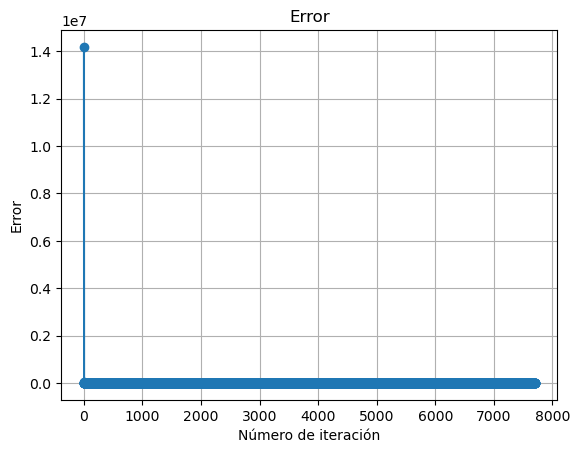

In [197]:
grafic_error(errores)

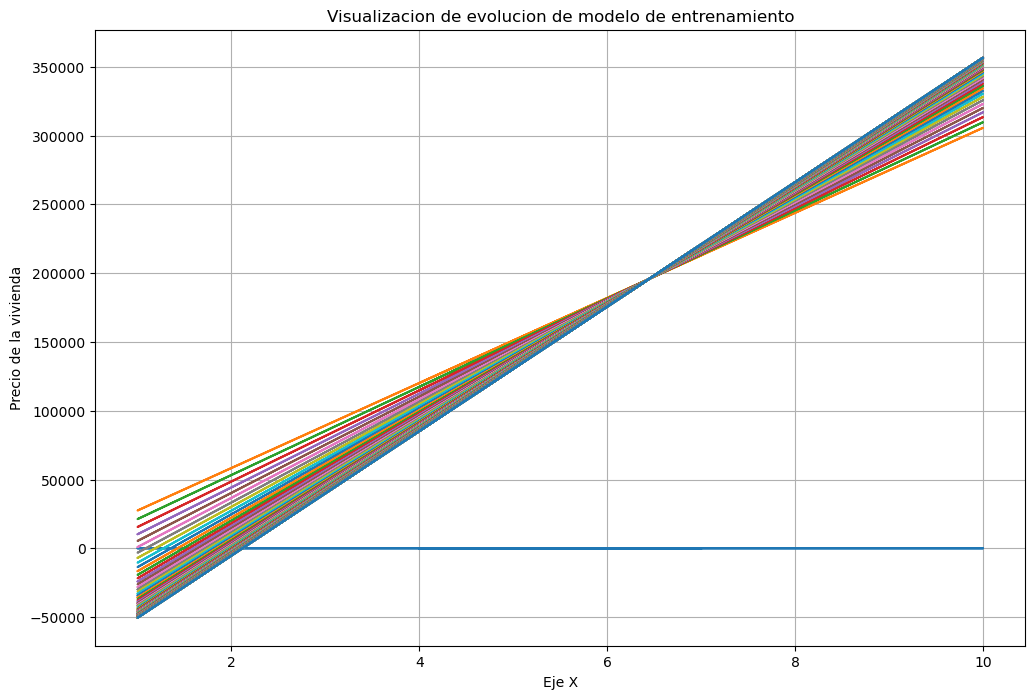

In [200]:
graficar_evolucion_modelo(beta_final_OverallQual,dataset_entrenamiento[:,1], 70)

In [407]:
nueva = (dataset_entrenamiento[:,1]).reshape(-1, 1)
reg = LinearRegression().fit(nueva, dataset_entrenamiento[:,0])

In [410]:
predicciones = predecir(beta_final2_OverallQual, reg, dataset_validacion[:,1])
predicciones

,Modelo Entrenado Manual,Modelo Scikit-Learn,Promedio
0,130018.799116,130013.775034,130016.287075
1,130018.799116,130013.775034,130016.287075
2,84103.872197,84095.287961,84099.580079
3,267763.579874,267769.236254,267766.408064
4,130018.799116,130013.775034,130016.287075
...,...,...,...
287,175933.726035,175932.262108,175932.994071
288,175933.726035,175932.262108,175932.994071
289,130018.799116,130013.775034,130016.287075
290,130018.799116,130013.775034,130016.287075


In [411]:
predicciones['Precio Real'] = dataset_validacion[:,0]
predicciones['Error'] = (((predicciones['Promedio'] - predicciones['Precio Real']).abs())/predicciones['Precio Real'])*100
predicciones[['Promedio', 'Precio Real', 'Error']].abs()

,Promedio,Precio Real,Error
0,130016.287075,129500.0,0.398677
1,130016.287075,144000.0,9.710912
2,84099.580079,90000.0,6.556022
3,267766.408064,325300.0,17.686318
4,130016.287075,129900.0,0.089520
...,...,...,...
287,175932.994071,174000.0,1.110916
288,175932.994071,121000.0,45.399169
289,130016.287075,136000.0,4.399789
290,130016.287075,84500.0,53.865428


In [412]:
promedio_error = predicciones['Error'].mean()
error_max = predicciones['Error'].max()
error_min = predicciones['Error'].min()

print('Error promedio: ', promedio_error)
print('Error maximo', error_max)
print('Error minimo:', error_min)

Error promedio:  20.122327597873994
Error maximo 236.51537127218822
Error minimo: 0.012528519353453215


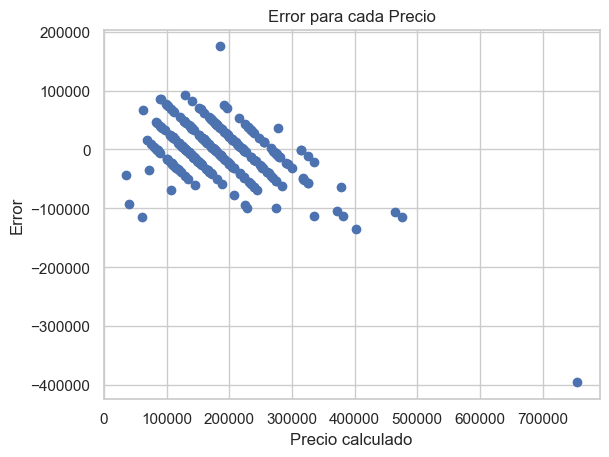

In [424]:
error = predicciones['Promedio'] - predicciones['Precio Real']
plt.plot(dataset_validacion[:,1], error, marker='o', linestyle='')
plt.title('Error para cada Precio')
plt.xlabel('Precio calculado')
plt.ylabel('Error')
plt.grid(True)
plt.show()

In [435]:
!git add Proyecto_19000522.ipynb
!git commit -m "T"
!git push --set-upstream origin master

[master ce922a6] Solo falta crear la funcion matplot para ver la evolucion del modelo
 1 file changed, 376 insertions(+), 152 deletions(-)
branch 'master' set up to track 'origin/master'.


To https://github.com/ElMangel/Proyecto-1--Regresi-n-con-c-digo.git
   744ef66..ce922a6  master -> master


In [323]:
almacen_it = dict()
almacen_it[f'suma_{i+1}'] = suma

Comparar los betas (mi modelo de entrenamietno y el de scikit)

No combinar el resultado de mi modelo con el de scikit

obtener las betas del modelo scikit: model.coef_[0], model.intercept_

Explicar más cada instancia de codigo creada con markdown

RMSE